# Create Metadata

This notebook creates metadata for each newspaper title saved as a CSV file. All metadata is collected from the `metadata.csv.zip` file.

In [1]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm

In [ ]:
# select collection to process
# lwm is the Living with Machines dataset
# hmd is the Heritage Made Digital dataset
root_dir = Path('path/to/csv')
collections = 'hmd' # 'hmd' | 'lwm'

In [3]:
Path(f'{collections}-metadata').mkdir(exist_ok=True)

In [4]:

files = list(Path(f'{root_dir}/{collections}-csv/').glob('[!.]*.csv'))
nlps = [f.stem.split('_')[0] for f in files]

In [ ]:
# number of titles to process
len(nlps)

14

In [6]:
metadata = pd.read_csv('data/metadata.csv.zip')

/var/folders/d2/ydv0grbd38985h6_95t0vdjw0000gp/T/ipykernel_8452/3434121404.py:1: DtypeWarning: Columns (16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('data/metadata.csv.zip')


In [ ]:
# add metadata and collect information on titles and counts per year
counts, titles = [], [], 
for nlp in tqdm(nlps):
    df = pd.read_csv(f'{root_dir}/{collections}-csv/{nlp}.csv')
    titles.extend(df.newspaper_title.unique().tolist())
    counts.append(df.groupby('year').size().to_dict())
    df_meta = metadata[metadata.NLP==int(nlp)]
    df_meta[['month','NLP', 'Title','index_npd', 'id',
       'chain_id', 'S-TITLE', 'D-EST', 'S-POL', 'S-PRICE', 'DISTRICT',
       'DISTRICT_PUB', 'COUNTY', 'D-PUB', 'E-LOC', 'E-ORG', 'E-PER']].to_csv(f'{collections}-metadata/{nlp}_metadata.csv', index=False)

100%|██████████| 14/14 [14:39<00:00, 62.81s/it]  


In [8]:
df_year = pd.DataFrame(counts).fillna(0).astype(int).sum(axis=0).sort_index()
df_year.sum(),df_year.index.min(), df_year.index.max()

(np.int64(2901554), np.int64(1801), np.int64(1871))

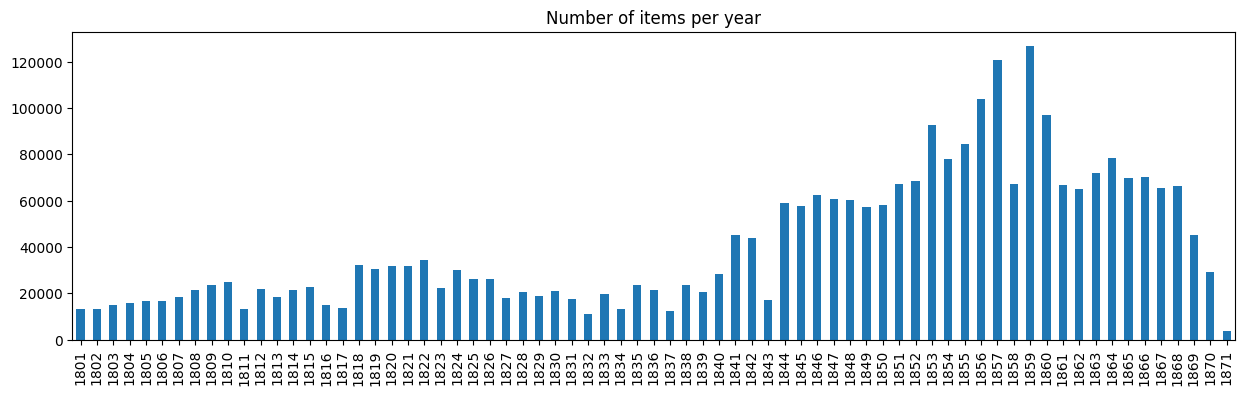

In [ ]:
# plot number of items per year
fig = df_year.plot(kind='bar' ,title='Number of items per year', figsize=(15,4)  )
fig.figure.savefig(f'figures/{collections}_items_per_year.png', bbox_inches='tight')

In [10]:
len(titles)

14

In [11]:
open(f'data/{collections}-titles.txt', 'w').write('\n'.join(sorted(titles)))

365